<a id='top'></a>

# Homework 5 Part 1: CSCI 4022 F19
***

**Name**: 

***

This assignment is due on Canvas by **MIDNIGHT on Friday December 6**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.
**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (15 pts; Theory: Recommendations)

To date, we've used **centered cosine distance** as a mechanism to center data.  This is not the only such option.  Consider the following:

Three computers, A, B, and C, have the numerical features listed below:

| Feature | A | B | C |
| --- | --- |
|Processor Speed | 3.06 | 2.68 | 2.92 |
|Disk Size | 500 | 320 | 640 |
|Main-Memory Size | 6 | 4 | 6 |

We may imagine these values as defining a vector for each computer; for instance, A's vector is [3.06, 500, 6]. We can compute the cosine distance between any two of the vectors, but if we do not scale the components (via a scalar multiplication), then the disk
size will dominate the dot product and make differences in the other components essentially invisible. Let us use 1 as the scale factor for processor speed, $\alpha$ for the disk size, and $\beta$ for the main memory size.

(a) In terms of $\alpha$ and $\beta$, compute the cosines of the angles between the vectors for each pair of the three computers.

(b) What are the angles between the vectors if $\alpha=\beta=1$?

(c) What are the angles between the vectors if $\alpha=0.01$ and $\beta=0.5$?

(d) One fair way of selecting scale factors is to make each inversely proportional to the average value in its component. What would be the values of $\alpha$ and $\beta$, and what would be the angles between the vectors?


**(a)**  
Cosines of the angles between Computer A and Computer B:
$$
\begin{align*}
cos(\theta_{AB}) &= \dfrac{(3.06 * 2.68) + (500\alpha * 320\alpha) + (6\beta * 4\beta)}{\sqrt{(3.06)^2 + (500\alpha)^2 + (6\beta)^2} \sqrt{(2.68)^2 + (320\alpha)^2 + (4\beta)^2}} \\
&= \dfrac{8.0936 + 160000\alpha^2 + 24\beta^2}{\sqrt{(3.06)^2 + (500\alpha)^2 + (6\beta)^2} \sqrt{(2.68)^2 + (320\alpha)^2 + (4\beta)^2}}
\end{align*}
$$
Cosines of the angles between Computer A and Computer C:
$$
\begin{align*}
cos(\theta_{AC}) &= \dfrac{(3.06 * 2.92) + (500\alpha * 640\alpha) + (6\beta * 6\beta)}{\sqrt{(3.06)^2 + (500\alpha)^2 + (6\beta)^2} \sqrt{(2.92)^2 + (640\alpha)^2 + (6\beta)^2}} \\
&= \dfrac{8.9352 + 320000\alpha^2 + 36\beta^2}{\sqrt{(3.06)^2 + (500\alpha)^2 + (6\beta)^2} \sqrt{(2.92)^2 + (640\alpha)^2 + (6\beta)^2}}
\end{align*}
$$
Cosines of the angles between Computer B and Computer C:
$$
\begin{align*}
cos(\theta_{BC}) &= \dfrac{(2.68 * 2.92) + (320\alpha * 640\alpha) + (4\beta * 6\beta)}{\sqrt{(2.68)^2 + (320\alpha)^2 + (4\beta)^2} \sqrt{(2.92)^2 + (640\alpha)^2 + (6\beta)^2}} \\
&= \dfrac{7.8256 + 204800\alpha^2 + 24\beta^2}{\sqrt{(2.68)^2 + (320\alpha)^2 + (4\beta)^2} \sqrt{(2.92)^2 + (640\alpha)^2 + (6\beta)^2}}
\end{align*}
$$

**(b)**  
$$
\begin{align*}
\theta_{AB} &= \cos^{-1} \Big( \dfrac{8.0936 + 160000 + 24}{\sqrt{(3.06)^2 + (500)^2 + (6)^2} \sqrt{(2.68)^2 + (320)^2 + (4)^2}} \Big) \\
&\approx 0.002583 
\\ \\
\theta_{AC} &= \cos^{-1} \Big( \dfrac{8.9352 + 320000 + 36}{\sqrt{(3.06)^2 + (500)^2 + (6)^2} \sqrt{(2.92)^2 + (640)^2 + (6)^2}} \Big) \\
&\approx 0.003052
\\ \\
\theta_{BC} &= \cos^{-1} \Big( \dfrac{7.8256 + 204800 + 24}{\sqrt{(2.68)^2 + (320)^2 + (4)^2} \sqrt{(2.92)^2 + (640)^2 + (6)^2}} \Big) \\
&\approx 0.004929
\end{align*}
$$

**(c)**
$$
\begin{align*}
\theta_{AB} &= \cos^{-1} \Big( \dfrac{8.0936 + 160000(0.01)^2 + 24(0.5)^2}{\sqrt{(3.06)^2 + (500(0.01))^2 + (6(0.5))^2} \sqrt{(2.68)^2 + (320(0.01))^2 + (4(0.5))^2}} \Big) \\
&\approx 0.159138
\\ \\
\theta_{AC} &= \cos^{-1} \Big( \dfrac{8.9352 + 320000(0.01)^2 + 36(0.5)^2}{\sqrt{(3.06)^2 + (500(0.01))^2 + (6(0.5))^2} \sqrt{(2.92)^2 + (640(0.01))^2 + (6(0.5))^2}} \Big) \\
&\approx 0.130055
\\ \\
\theta_{BC} &= \cos^{-1} \Big( \dfrac{7.8256 + 204800(0.01)^2 + 24(0.5)^2}{\sqrt{(2.68)^2 + (320(0.01))^2 + (4(0.5))^2} \sqrt{(2.92)^2 + (640(0.01))^2 + (6(0.5))^2}} \Big) \\
&\approx 0.248925
\end{align*}
$$

**(d)**  
The average Disk Size is $\frac{500+320+640}{3} \approx 486.67$, so $\alpha=\frac{1}{486.67} \approx 0.00205$.  
The average Main-Memory size is $\frac{6 + 4 + 6}{3} \approx 5.33$, so $\beta=\frac{1}{5.33}=0.1875$.  
Now solve for each theta using our updated $\alpha$ and $\beta$:

$$
\begin{align*}
\theta_{AB} &= \cos^{-1} \Big( \dfrac{8.0936 + 160000(0.00205)^2 + 24(0.1875)^2}{\sqrt{(3.06)^2 + (500(0.00205))^2 + (6(0.1875))^2} \sqrt{(2.68)^2 + (320(0.00205))^2 + (4(0.1875))^2}} \Big) \\
&\approx 0.182298
\\ \\
\theta_{AC} &= \cos^{-1} \Big( \dfrac{8.9352 + 320000(0.00205)^2 + 36(0.1875)^2}{\sqrt{(3.06)^2 + (500(0.00205))^2 + (6(0.1875))^2} \sqrt{(2.92)^2 + (640(0.00205))^2 + (6(0.1875))^2}} \Big) \\
&\approx 0.093531
\\ \\
\theta_{BC} &= \cos^{-1} \Big( \dfrac{7.8256 + 204800(0.00205)^2 + 24(0.1875)^2}{\sqrt{(2.68)^2 + (320(0.00205))^2 + (4(0.1875))^2} \sqrt{(2.92)^2 + (640(0.00205))^2 + (6(0.1875))^2}} \Big) \\
&\approx 0.188447
\end{align*}
$$

***
<a/ id='p2'></a>
[Back to top](#top)
# Problem 2 (20 pts; Practice: Recommendations)

This problem is about recommender systems. There is a joke recommender dataset that is linked below:

http://eigentaste.berkeley.edu/dataset/

You may use only the first zip file from Dataset1 that contains data from 24,983 users who have rated 36 or more jokes.

### Part  1:

Read the dataset and ensure it is clean. That is, that it contains no odd or fill entries such as NAN or nonsensical numerical values.

In [9]:
#YOUR CODE HERE
df_jester = pd.read_csv("jester-data-1.csv", header=None)
# Add column names and indicies
df_jester.index = range(df_jester.shape[0])
df_jester.index.name = "userID"

col_names = ["joke"+str(i) for i in range(1, df_jester.shape[1])]
df_jester.columns = ["NumRated"] + col_names

# The 99 value is used to indicate jokes that haven't been ranked. Will replace that with NaN
df_jester[df_jester==99] = np.nan
df_jester.head()

,NumRated,joke1,joke2,joke3,joke4,joke5,joke6,joke7,joke8,joke9,...,joke91,joke92,joke93,joke94,joke95,joke96,joke97,joke98,joke99,joke100
userID,,,,,,,,,,,,,,,,,,,,,
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Part 2:

As we are developing a naive recommender system, we are going to design our own implementation.

Assume there is an user who has rated only one joke and that happens to be joke 8. The user has given the joke a rating of 5. The user has not rated any other joke. So all the other values will be 99.(Read the documentation of the dataset as to why?).

Now we have to recommend a set of jokes to the user.

#### Part 2a:

You will need to find a list of 'm' people who have given a similar rating on joke 8. The value of m is your choice.

In [28]:
def cosine_sim(new_row, row):
    # Only want to look at ratings, not "num_rated" column
    new_row = new_row[1:]
    row = row[1:]
    
    numerator = np.nansum(new_row * row)
    norm_1 = np.sqrt(np.nansum(np.power(new_row, 2)))
    norm_2 = np.sqrt(np.nansum(np.power(row, 2)))
    
    sim = numerator / (norm_1 * norm_2)
    return np.abs(sim)

In [155]:
def close_to_5(new_row):
    # Because the new user has only ranked one joke, can really only find people who have ranked it similarly
    # Is a distance calculation, the closer to 5, the smaller the score.
    joke5_rank = new_row[8]
    return np.abs(joke5_rank - 5)

In [158]:
#YOUR CODE HERE
new_user = np.repeat(np.nan, df_jester.shape[1])
new_user[0] = 1  # The user has rated 1 joke
new_user[8] = 5  # The user rated the 8th joke as 5

# Find the closest m other users using Cosine Similarity
m = df_jester.loc[df_jester["joke8"] == 5].shape[0]  # Let m be the number of people who had the same rating on joke8.

# sim_scores = df_jester.apply(lambda row: close_to_5(row), axis=1)
sim_scores = df_jester.apply(lambda row: close_to_5(row), axis=1)
# find the m best sim scores
best_scores = np.sort(sim_scores)[:m]  # Gets the best m sim scores by sorting and getting 
similar_user_idxs = np.where(np.isin(sim_scores, best_scores))  # Gets the indexes of the m most similar users

print("The {} most similar users have indexes:\n {}".format(m, similar_user_idxs[0]))

The 54 most similar users have indexes:
 [   11   423   778  1317  2765  2823  2843  2917  2948  3115  3810  4400
  4579  4904  5004  6313  6890  6950  6985  7459  7786  7891  8411  8963
 10334 10335 10958 11066 11792 14012 14775 14890 14997 15023 15279 15556
 15984 17058 17338 18028 18251 18796 18918 19865 20873 20944 21643 22147
 22726 22781 23471 23473 23988 24899]


#### Part 2b:

You will also need to find the top 'n' jokes rated by these 'm' users. Again 'n' is your choice.

In [159]:
#YOUR CODE HERE

# Create a df of just the similar users
df_sim = df_jester.loc[similar_user_idxs]
# Normalize each row by subtracting the user's average rating, 
# This changes the rank from being a value to being the amount above or below the user's average, which should better
# reflect which jokes had the highest rankings.
df_sim_norm = df_sim.sub(np.nanmean(df_sim, axis=1), axis=0)
# Because we're looking for the top jokes, don't want to subtract the joke means.

n = 5
# Calculate each joke's average score
joke_scores = np.nanmean(df_sim_norm, axis=0)[1:]  # Remove first row because that tracks number of jokes ranked, not a score
top_joke_scores = np.sort(joke_scores)[-n:]
top_joke_idxs = np.where(np.isin(joke_scores, top_joke_scores))

# Plus 1 because 0 indexed in array, when jokes are 1 indexed.
print("The top {} jokes by the most similar users were jokes: {}".format(n, top_joke_idxs[0] + 1))

The top 5 jokes by the most similar users were jokes: [ 8 32 35 36 50]


#### Part 2c:

Justify why you picked these values for 'n' and 'm'.<br> How do you think your recommendation is going to change with changing 'm' and keeping 'n' constant?. <br>
Comment about both the increasing and decreasing sub-case in changing 'm'.

I chose to have $m$ be the number of people who rated joke8 the same as the new user and $n=0.05*number\_of\_jokes$. This led to $m=54$ similar users and $n=5$. I chose this value of $m$ because we had limited data on the new user, having only rated one joke, so choosing a smaller value of $m$ would exclude similar users for no obvious reason. I then used all $m$ users with the same rating for joke8 as the new user as my selection to find the top $n$ jokes. I selected $n=5$ because I thought it would be a good reflection of some jokes that were similar to the first joke. Seeing how all 5 jokes are about religion (except joke 36, which is about the Polish), it makes sense that the "group" would rate them similarly.

If we increase the size of $m$, then there are more people's recommendations being considered in finding the $n$ best jokes. In the extreme case where $m$ is all of the possible users, then the $n$ jokes recommended will be the most generally high ranking jokes. By keeping $m$ smaller, the jokes will be more specific to the preferences of the new user, taking their prior rankings into account more.

In theory, if we decrease $m$, then the opposite effect happens to above. The resulting recommendations should become more specific to the jokes that have already been rated highly. However, in our case, because the new users only has $1$ ranked joke, decreasing $m$ won't have a discernable impact because it currently represents the total number of users who also ranked the joke as $5$.

### Question 4:

Read some of the jokes.  Repeat your favorite(s) here:

Some of my favorites:
* Joke 28: A mechanical, electrical and a software engineer from Microsoft were driving through the desert when the car broke down. The mechanical engineer said "It seems to be a problem with the fuel injection system, why don't we pop the hood and I'll take a look at it." To which the electrical engineer replied, "No I think it's just a loose ground wire, I'll get out and take a look." Then, the Microsoft engineer jumps in. "No, no, no. If we just close up all the windows, get out, wait a few minutes, get back in, and then reopen the windows everything will work fine."
* Joke 32: A man arrives at the gates of heaven. St. Peter asks, "Religion?" The man says, "Methodist." St. Peter looks down his list, and says, "Go to room 24, but be very quiet as you pass room 8." Another man arrives at the gates of heaven. "Religion?" "Baptist." "Go to room 18, but be very quiet as you pass room 8." A third man arrives at the gates. "Religion?" "Jewish." "Go to room 11, but be very quiet as you pass room 8." The man says, "I can understand there being different rooms for different religions, but why must I be quiet when I pass room 8?" St. Peter tells him, "Well the Catholics are in room 8, and they think they're the only ones here.
* Joke 36: A guy walks into a bar, orders a beer and says to the bartender, "Hey, I got this great Polish Joke..." The barkeep glares at him and says in a warning tone of voice: "Before you go telling that joke you better know that I'm Polish, both bouncers are Polish and so are most of my customers." "Okay" says the customer,"I'll tell it very slowly."

***
<a/ id='p3'></a>
[Back to top](#top)
# Problem 3 (15 pts; Practice, Graph Partitioning)

Suppose our graph is given below:


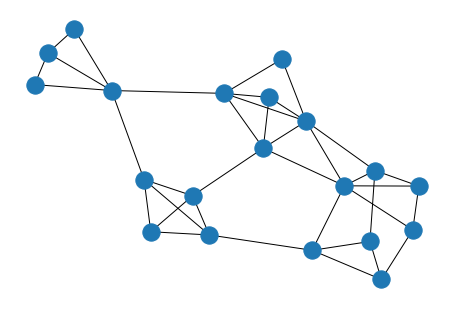

In [90]:
#### Generated Example
G=nx.Graph()
np.random.seed(4812)

edges=[[0,1],[0,2],[0,3],[1,2],[1,3],[2,3],\
      [4,5],[4,6],[5,6],\
      [7,8],[7,9],[7,10],[8,9],[8,10],\
      [11,12],[11,13],[11,14],[11,15],[12,13],[13,14],[14,15],\
      [16,17],[16,18],[16,19],[17,19],[18,19],\
      [1,16],[2,14],[3,5],[4,6],[5,7],[6,9],[4,10],[10,13],[7,13],[7,14],[13,15],[11,16]]

nodes=[i for i in range(20)]
G.add_nodes_from(nodes)
for i in range(len(edges)):
    G.add_edge(edges[i][0],edges[i][1])

nx.draw(G)

Loosely speaking, the data is generated from 5 clusters, although 2 clusters overlap somewhat.

### Part 1:
Find the Fiedler vector for the graph.  Plot the sorted Fiedler vector.  Use the `edges` array defined above.


In [91]:
# Create adjacency matrix by looping over all edges
A = np.zeros([len(nodes), len(nodes)])
for edge in edges:
    # Note to change at each vertex because symmetric matrix
    A[edge[0], edge[1]] = 1
    A[edge[1], edge[0]] = 1

# Diagonal matrix is the degree of each node
D = np.diag([np.sum(node) for node in A])

# Create Laplacian
L = D - A

# The Fiedler vector is the eigenvector associated with the second smallest eigenvalue. So let's find the eigenstuffs.
evals, evecs = np.linalg.eig(L)
# Get the index of the second smallest eigenvector
eval_x2 = np.partition(evals, 2)[1]
idx_x2 = np.where(evals == eval_x2)[0][0]
# Get x2, the eigenvector associated with the second smallest eigenvector (aka the Fiedler vector)
fiedler = evecs[:, idx_x2]

print("The Fiedler vector is:\n{}".format(fiedler))

The Fiedler vector is:
[-0.03774391 -0.09343526 -0.01581853  0.00776712  0.22684928  0.17564923
  0.23820151  0.17512085  0.22657149  0.23798296  0.19610661 -0.00625636
  0.05246521  0.09486077  0.0650603   0.05714945 -0.29887072 -0.43388667
 -0.43388667 -0.43388667]


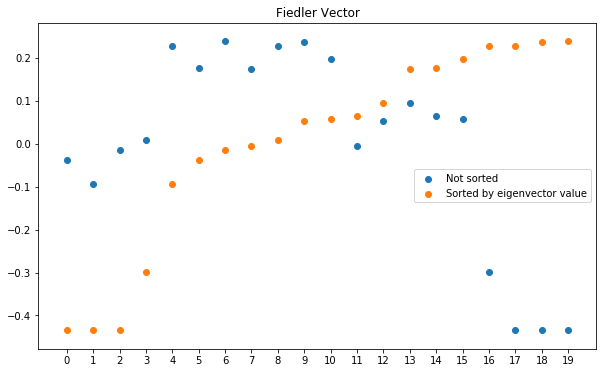

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(list(range(len(nodes))), fiedler, label="Not sorted")
ax.scatter(list(range(len(nodes))), np.sort(fiedler), label="Sorted by eigenvector value")
ax.set_xticks(range(0, 20));
ax.set_title("Fiedler Vector")
ax.legend()


### Part 2: Partitions

#### Part 2a:

Partition the graph into 2 graphs using this vector.  Include a picture of the associated *cut* of the graph.


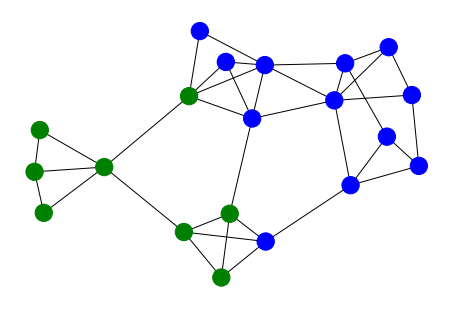

In [96]:
G = nx.Graph()

nodes=[i for i in range(20)]

# Add a color map based on the fiedler assignements
color_map = []
for fied in fiedler:
    if fied <= 0:
        color_map.append("green")
    else:
        color_map.append("blue")

G.add_nodes_from(nodes)

for i in range(len(edges)):
    G.add_edge(edges[i][0], edges[i][1])

nx.draw(G, node_color=color_map)


#### Part 2b:

Partition the graph into 3 subgraphs using the Fiedler vector.  Include both associated *cuts* in another picture of the graph.

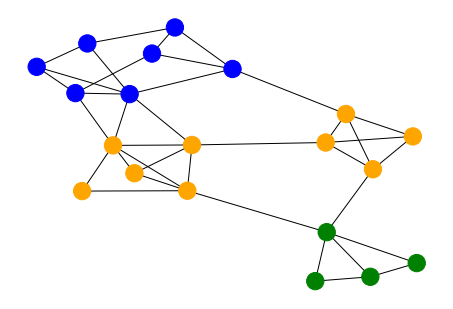

In [101]:
G = nx.Graph()

nodes=[i for i in range(20)]

# Add a color map based on the fiedler assignements
color_map = []
for fied in fiedler:
    if fied <= -0.2:
        color_map.append("green")
    elif fied >= 0.15:
        color_map.append("blue")
    else:
        color_map.append("orange")

G.add_nodes_from(nodes)

for i in range(len(edges)):
    G.add_edge(edges[i][0], edges[i][1])

nx.draw(G, node_color=color_map)



### Part 2c:

Partition the graph into 4 subgraphs using bipartitioning.


In [114]:
a = [1, 2, 3, 4]
a.index(4)

3

In [119]:
# Use the Fiedler vector to get two subgraphs
comm_match = fiedler <= 0

nodes_c1 = np.where(comm_match)
nodes_c2 = np.where(~comm_match)

def bipartition(node_idxs):
    # Create a map from index in overall graph to index in subgraph
    node_map = []
    for node in node_idxs:
        node_map.append(node)
        
    # Define an adjacency matrix for the subgraph
    A = np.zeros((len(node_idxs), len(node_idxs)))
    for edge in edges:
        # Determine if both nodes are in the subgraph
        if edge[0] in node_idxs and edge[1] in node_idxs:
            # Add edge to the subgraph adjacency matrix
            node_1 = node_map.index(edge[0])
            node_2 = node_map.index(edge[1])
            A[node_1, node_2] = 1
            A[node_2, node_1] = 1
            
    # Create a Diagonal Matrix from the degree of each node
    D = np.diag(np.sum(A, axis=1))
    # Create a laplacian matrix, L=D-A
    L = D - A
    return L, node_map

# Get the Laplacian of each community
L_c1, map_c1 = bipartition(nodes_c1[0])
L_c2, map_c2 = bipartition(nodes_c2[0])

def get_fiedler(L):
    # The Fiedler vector is the eigenvector associated with the second smallest eigenvalue. So let's find the eigenstuffs.
    evals, evecs = np.linalg.eig(L)
    # Get the index of the second smallest eigenvector
    eval_x2 = np.partition(evals, 2)[1]
    idx_x2 = np.where(evals == eval_x2)[0][0]
    # Get x2, the eigenvector associated with the second smallest eigenvector (aka the Fiedler vector)
    fiedler = evecs[:, idx_x2]
    return fiedler

fiedler_c1 = get_fiedler(L_c1)
fiedler_c2 = get_fiedler(L_c2)

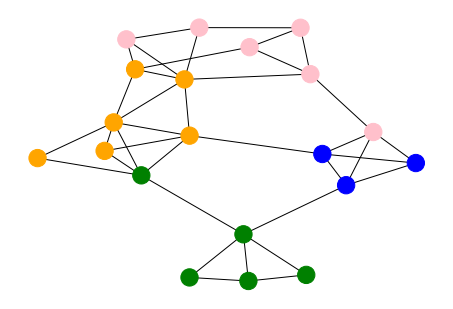

In [122]:
# With the two fiedler vectors, we can create create two subgraphs from each community.
G = nx.Graph()

nodes=[i for i in range(20)]

# Add a color map based on the fiedler assignements
color_map = [None] * 20
for subgraph_idx, fied in enumerate(fiedler_c1):
    graph_idx = map_c1[subgraph_idx]  # Get the original index from the subgraph index
    if fied <= 0:
        color_map[graph_idx] = "blue"
    else:
        color_map[graph_idx] = "green"
        
for subgraph_idx, fied in enumerate(fiedler_c2):
    graph_idx = map_c2[subgraph_idx]
    if fied <= 0:
        color_map[graph_idx] = "orange"
    else:
        color_map[graph_idx] = "pink"
        
G.add_nodes_from(nodes)

for i in range(len(edges)):
    G.add_edge(edges[i][0], edges[i][1])

nx.draw(G, node_color=color_map)


### Part 2d:

Of the 3 partitions above, which do you think were most appropriate.


If the three graphs, the graph with three partitions appears split the data the best. There is not a lot of one community bleeding into another, as we can see in the fourth partition. This might be due to the "arbitrary" choice of where to split the graphs using the original fiedler vector, but it still led to the best results. The graph with two partitions also appears to be splitting two of the communities in half, which also lends us to not select that one.

***
<a/ id='p4'></a>
[Back to top](#top)
# Problem 4 (15 pts; Simulation, Graph Partitioning)

Simulate a graph from the AGM model with two nested communities and one global community under the following conditions:

    1) There are 10 members of community A with intracommunity connection probability of .25.

    2) There are 10 members of community B with intracommunity connection probability of .5.

    3) The intercommunity connection (or universal community) probability is .15.

Generate the optimal Fiedler vector partition of the simulated graph.



In [166]:
def sim_graph_partition(seed=None):
    '''
    iterations: The number of times the graph is simulated and the fiedler vector is created.
    
    return: average fielder vector of all iterations
    '''
    if seed:
        np.random.seed(seed)
    # Define the conditions established above
    size_c1 = 10
    prob_c1 = 0.25
    
    size_c2 = 10
    prob_c2 = 0.5
    
    epsilon = 0.15
    size_total = size_c1 + size_c2  # Total number of nodes in graph
    
    # Define a matrix for the probability that two nodes will have an edge
    c_probs = np.zeros((size_total, size_total))
    c_probs = np.zeros((size_total, size_total))
    c_probs[:size_c1, :size_c2] = 1 - (1-prob_c1)*(1-epsilon)  # Probability of a node in c1 connecting to node in c1
    c_probs[size_c1:, size_c2:] = 1 - (1-prob_c2)*(1-epsilon)  # Probability of a node in c2 connecting to node in c2
    c_probs[:size_c1, size_c2:] = 1 - (1-epsilon)  # Probability of a node in c1 connecting to a node in c2

    # Calculate random probabilities for each edge by randomly sampling.
    # If the random variable is less than the required probability, then there is an edge, otherwise no edge.
    random_probs = np.random.sample((size_total, size_total))
    A = random_probs < c_probs  # This is our adjacency matrix, defining edges between nodes
    # Now make A symmetric by copying the upper triangular values onto the lower.
    A = np.tril(A.T, 0).astype(int) + np.triu(A, 0).astype(int)
    # Then set diagonal entries to zero
    np.fill_diagonal(A, 0)

    # Now create matrix D, the diagonal matrix with the degree of each node
    D = np.diag([np.sum(node) for node in A])

    # Create Laplacian from L=D-A
    L = D - A

    # Get the fielder vector from the eigenvector corresponding to the second smallest eigenvalue
    evals, evecs = np.linalg.eig(L)
    # Get the index of the second smallest eigenvector
    eval_x2 = np.partition(evals, 2)[1]
    idx_x2 = np.where(evals == eval_x2)[0][0]
    # Get x2, the eigenvector associated with the second smallest eigenvector (aka the Fiedler vector)
    fiedler = evecs[:, idx_x2]

    return fiedler, A

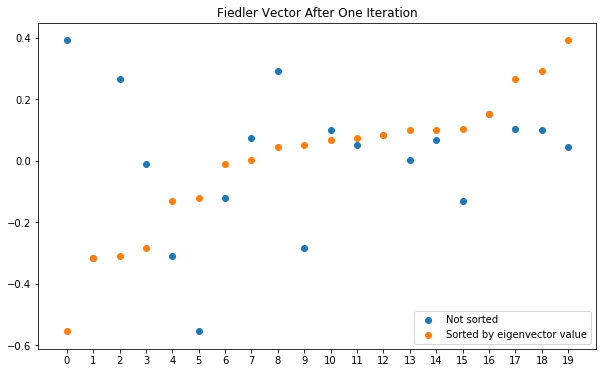

In [167]:
fiedler_one, adj_mat = sim_graph_partition()
# Plot the fiedler vector
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(list(range(len(nodes))), fiedler_one, label="Not sorted")
ax.scatter(list(range(len(nodes))), np.sort(fiedler_one), label="Sorted by eigenvector value")
ax.set_xticks(range(0, 20));
ax.set_title("Fiedler Vector After One Iteration")
ax.legend();

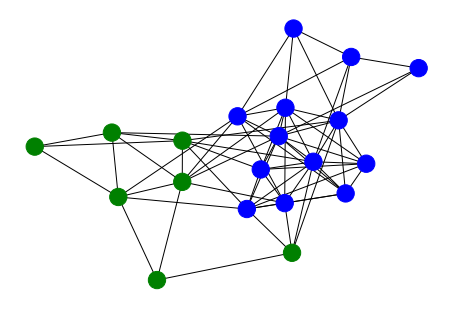

In [168]:
G = nx.from_numpy_matrix(adj_mat)

# Add a color map based on the fiedler assignements
color_map = []
for fied in fiedler_one:
    if fied <= 0:
        color_map.append("green")
    else:
        color_map.append("blue")

nx.draw(G, node_color=color_map)


Repeat this analysis 1000 times, then answer the following:

    1) On average, how many members of group A are correctly associated within the same group? 

    2) On average, how many members of group B are correctly associated within the same group?
    
Do your results make sense?

In [187]:
iterations = 1000
correct_com_A = 0
correct_com_B = 0

for i in range(iterations):
    # Calculate the fiedler vector
    fiedler, _ = sim_graph_partition()
    # Divide the graph into two subgraphs
    node_communities = fiedler >= 0

    nodes_in_partition_1 = np.where(node_communities)[0]
    num_in_com_1 = np.sum(nodes_in_partition_1 <= 9)
    num_in_com_2 = np.sum(nodes_in_partition_1 >= 10)
    max_com = np.max((num_in_com_1, num_in_com_2))
    
    num_com_A = 0
    num_com_B = 0
    # Find which community has the most in partition 1. Then the most in the other community is the max of the complement.
    # This will be 10 - the number in the first partition.
    if num_in_com_1 == max_com:
        num_com_A = num_in_com_1
        num_com_B = 10 - num_in_com_2
    else:
        num_com_A = 10 - num_in_com_1
        num_com_B = num_in_com_2
        
    correct_com_A += num_com_A
    correct_com_B += num_com_B
            
# Find average number of community A that were correctly labeled
avg_com_A = correct_com_A / iterations
print("The average number of correctly labeled members of group A was {}".format(np.round(avg_com_A, 4)))

# Repeat for group B
avg_com_B = correct_com_B / iterations
print("The average number of correctly labeled members of group B was {}".format(np.round(avg_com_B, 4)))

The average number of correctly labeled members of group A was 6.496
The average number of correctly labeled members of group B was 8.806


From the results, we can see that approximately $6$ nodes are in community A and approximately $9$ are in community B. This makes sense as there is a higher probability of intracommunity edges between community B than community A. 